<a href="https://colab.research.google.com/github/ianbounos/brain-networks/blob/main/C_Elegans_Binary_Undirected_Graph_3_Random%20and%20directed%20attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C Elegans - Binary undirected graph - Global Measures




Here we go "killing" an edge at random and measuring how a metric of the overall functioning of the network changes after the process. The first metric to consider is the size of the largest connected component relative to the size of the network.


In [1]:

from google.colab import drive

# Monta tu Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [3]:
file_path = "/content/drive/My Drive/Grafos y Cerebro/celegans277matrix.csv"
adjacency_matrix = pd.read_csv(file_path, header=None)

# Create undirected graph from adjacency grapha
G = nx.DiGraph(adjacency_matrix.values)
G = G.to_undirected()



In [ ]:

import random


# Create G_aux as a copy of the original graph
G_aux = G.copy()
# List to store fractions of the largest connected component
largest_connected_components = []

# Initial edge count
initial_edge_count = G_aux.number_of_edges()

N_extractions = 1918
# Perform the experiment 100 times
for _ in range(100):  # Repeat the experiment 100 times
    G_aux = G.copy()  # Reset G_aux to the original graph
    largest_connected_components_experiment = []  # Store the results for this experiment
    for i in range(1, N_extractions):
        # Calculate the relative size of the current largest connected component
        largest_connected_component_size = len(max(nx.connected_components(G_aux), key=len)) / len(G_aux)
        largest_connected_components_experiment.append(largest_connected_component_size)

        # Choose a random edge and remove it
        if G_aux.number_of_edges() > 0:
            edge_to_remove = random.choice(list(G_aux.edges()))
            G_aux.remove_edge(*edge_to_remove)

    # Add the results of this experiment to the main list
    largest_connected_components.append(largest_connected_components_experiment)


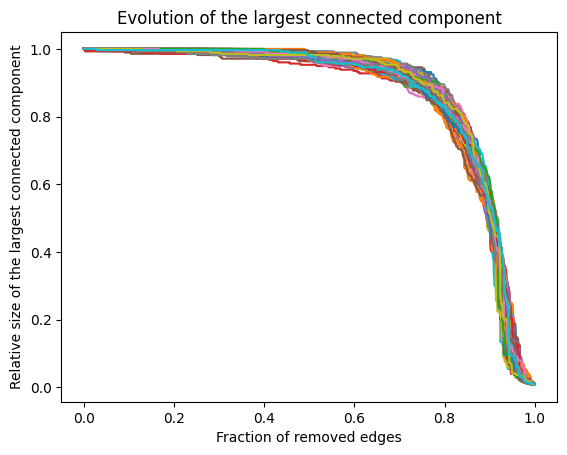

In [15]:

# Plot the evolution for all 100 experiments
for i in range(100):
    plt.plot(np.linspace(0, N_extractions / initial_edge_count, N_extractions - 1),
             largest_connected_components[i], label=f'Experiment {i}')

plt.xlabel('Fraction of removed edges')
plt.ylabel('Relative size of the largest connected component')
plt.title('Evolution of the largest connected component')
plt.show()

We can change the "killing" process and kill nodes instead of edges and instead of a random attack we can kill the nodes of largest degree. Lets see the difference:

In [51]:

# Create G_aux as a copy of the original graph
G_aux = G.copy()
# List to store fractions of the largest connected component
largest_connected_components = []

# Initial edge count
initial_edge_count = G_aux.number_of_edges()

N_extractions = 277
# Perform the experiment 100 times
for _ in range(100):  # Repeat the experiment 100 times
    G_aux = G.copy()  # Reset G_aux to the original graph
    largest_connected_components_experiment = []  # Store the results for this experiment
    for i in range(1, N_extractions):
        # Check if there are nodes in the graph
        if G_aux.number_of_nodes() > 0:
            # Calculate the relative size of the current largest connected component
            largest_connected_component_size = len(max(nx.connected_components(G_aux), key=len)) / len(G_aux)
            largest_connected_components_experiment.append(largest_connected_component_size)

            # Choose the node with the largest degree and remove it
            node_degrees = G_aux.degree
            if node_degrees:
                node_to_remove = max(node_degrees, key=lambda x: x[1])[0]
                G_aux.remove_node(node_to_remove)

    # Add the results of this experiment to the main list
    largest_connected_components.append(largest_connected_components_experiment)

In [40]:
len(largest_connected_components[1])

277

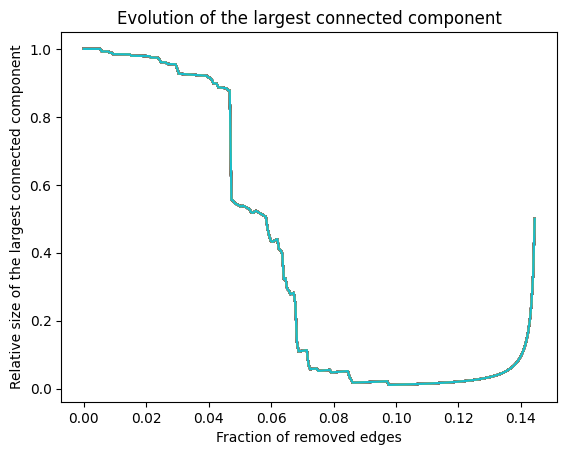

In [52]:

# Plot the evolution for all 100 experiments
for i in range(100):
    plt.plot(np.linspace(0, N_extractions / initial_edge_count, N_extractions - 1),
             largest_connected_components[i], label=f'Experiment {i}')

plt.xlabel('Fraction of removed edges')
plt.ylabel('Relative size of the largest connected component')
plt.title('Evolution of the largest connected component')
plt.show()

**Average shortest path**

Here we define a function that calculates the average shortest path of a graph. We repeat the same process but with this measure and just one experiment because of time restrictions. In this case, the graph is really different because at one point, the average shortest path starts decreasing.

In [16]:
def calculate_average_shortest_path(graph):
    # Calculate all shortest paths between all pairs of nodes
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))

    # Calculate the sum of all shortest path lengths
    total_shortest_path_length = sum(sum(length.values()) for length in shortest_paths.values())

    # Calculate the total number of node pairs
    total_pairs = sum(len(length) for length in shortest_paths.values())

    # Calculate the average shortest path
    average_shortest_path = total_shortest_path_length / total_pairs

    return average_shortest_path

In [17]:
calculate_average_shortest_path(G)

2.6293578699057725

In [29]:
# Create G_aux as a copy of the original graph
G_aux = G.copy()
# List to store fractions of the average shortest path
average_shortest_path_list = []

# Initial edge count
initial_edge_count = G_aux.number_of_edges()

N_extractions = 1918
# Perform the experiment 10 times
for _ in range(1):  # Repeat the experiment 10 times
    G_aux = G.copy()  # Reset G_aux to the original graph
    average_shortest_path_experiment = []  # Store the results for this experiment
    for i in range(1, N_extractions):
        if i % 100 == 0:
          print(i)
        # Calculate the average shortest path
        average_shortest_path = calculate_average_shortest_path(G_aux)
        average_shortest_path_experiment.append(average_shortest_path )

        # Choose a random edge and remove it
        if G_aux.number_of_edges() > 0:
            edge_to_remove = random.choice(list(G_aux.edges()))
            G_aux.remove_edge(*edge_to_remove)

    # Add the results of this experiment to the main list
    average_shortest_path_list.append( average_shortest_path_experiment)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


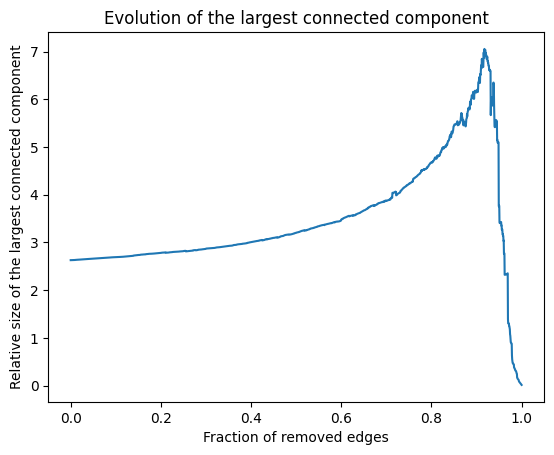

In [30]:
# Plot the evolution for all 10 experiments
for i in range(1):
    plt.plot(np.linspace(0, N_extractions / initial_edge_count, N_extractions - 1),
             average_shortest_path_list[i], label=f'Experiment {i}')

plt.xlabel('Fraction of removed edges')
plt.ylabel('Relative size of the average shortest path')
plt.title('Evolution of the average shortest path')
plt.show()